In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd 
import mysql.connector 
import sqlite3
import csv  
from sklearn.linear_model import LogisticRegression   
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np 
from sklearn import metrics   
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings   
warnings.filterwarnings('ignore')

# Motivation for analysis :
This analysis aims to determine the validity of the statement that states that the Best Film Editing category is the best predictor of Best Picture

## Scraping Data to use as reference.
- This cell of code scrapes two lists from IMDB.COM, which I used for reference to make sure the Dataframes I created have the right information in them. I decided to look for lists that have the winners for best picture and best film editing. I then proceeded to make two dataframes with the information.

In [2]:
url_best_picture = "https://www.imdb.com/list/ls009480135/?sort=list_order,asc&st_dt=&mode=simple&page=1&ref_=ttls_vw_smp" 
url_best_edit = 'https://www.imdb.com/list/ls051258848/'
response_1 = requests.get(url_best_picture)  
response_2 = requests.get(url_best_edit)
soup_1 = BeautifulSoup(response_1.content, "html.parser") 
soup_2 = BeautifulSoup(response_2.content, "html.parser") 
movie_elements_1 = soup_1.find_all("span", class_="lister-item-header")  
movie_elements_2 = soup_2.find_all("h3", class_="lister-item-header") 
counter = 0
titles_1 = []
years_1 = [] 
titles_2 = [] 
years_2 = [] 

In [3]:
for element in movie_elements_1:
    title_element_1 = element.find("a").text
    year_element_1 = element.find("span", class_="lister-item-year").text.strip("()")

    titles_1.append(title_element_1)
    years_1.append(year_element_1) 

data = {"Winner_picture": titles_1, "Year": years_1}
df_best_picture = pd.DataFrame(data) 

for element in movie_elements_2:
    title_element_2 = element.find("a").text
    year_element_2 = element.find("span", class_="lister-item-year").text.strip("()")

    titles_2.append(title_element_2)
    years_2.append(year_element_2) 
    
data = {"Winner_edit": titles_2, "Year": years_2}
df_best_edit = pd.DataFrame(data) 


In [4]:
df_best_picture.head()

,Winner_picture,Year
0,Nomadland,2020
1,Parasite,2019
2,Green Book,2018
3,The Shape of Water,2017
4,Moonlight,I) (2016


In [5]:
df_best_edit.head()

,Winner_edit,Year
0,Ford v Ferrari,2019
1,Bohemian Rhapsody,2018
2,Dunkirk,2017
3,Hacksaw Ridge,2016
4,Mad Max: Fury Road,2015


# Source of data 
I decided to make the two dataframes manually, as I could not find a website that provided me with the same exact information I need in order to prepare the data for scikit-learn. The two dataframes contain four columns, one for the film name, the year, the winner and the nominees. The film name column has the name of the films and the year has the name of the years. The winner and nominee columns included a 1, and 0 for winner and losers respectively. In order to use the machine learning algorithms from scikit-learn, the algorithms needs a binary format for the targets in this case, and numerical values for the features.

In [6]:
data_best_picture = {'best_picture_films': ['Parasite','The Irishman','1917','Joker','Once Upon a Time... in Hollywood', 'Ford v Ferrari', 
'Marriage Story', 'Little Women', 'Jojo Rabbit','Green Book','Roma', 'The Favourite', 'Black Panther', 'A Star Is Born', 
'BlacKkKlansman','Bohemian Rhapsody', 'Vice','The Shape of Water', 'Three Billboards Outside Ebbing', 'Missouri; Dunkirk'
'Lady Bird', 'Get Out', 'The Post', 'Darkest Hour', 'Call Me by Your Name', 'Phantom Thread','Moonlight', 'La La Land', 
'Manchester by the Sea', 'Hidden Figures: The Untold Story of the African American Women Who Helped win the Space Race', 
'Fences', 'Arrival', 'Hacksaw Ridge', 'Hell or High Water', 'Lion','Spotlight', 'The Revenant', 'The Big Short', 
'The Martian', 'Mad Max: Fury Road', 'Room', 'Bridge of Spies', 'Brooklyn','Birdman or (The Unexpected Virtue of Ignorance)', 
'American Sniper', 'Boyhood', 'The Grand Budapest Hotel', 'The Imitation Game', 'Selma', 'The Theory of Everything', 
'Whiplash','12 Years a Slave', 'Gravity', 'American Hustle', 'Dallas Buyers Club', 'Her', 'Philomena', 'The Wolf of Wall Street', 
'Captain Phillips', 'Nebraska','Argo', 'Lincoln', 'Zero Dark Thirty', 'Les Misérables', 'Life of Pi', 'Silver Linings Playbook', 
'Django Unchained', 'Amour', 'Beasts of the Southern Wild','The Artist', 'The Tree of Life', 'The Help', 'The Descendants', 
'Hugo', 'Midnight in Paris', 'Moneyball', 'War Horse', 'Extremely Loud & Incredibly Close','The King\'s Speech',
'The Social Network', 'Inception', '127 Hours', 'Black Swan', 'The Fighter', 'The Kids Are All Right', 'Toy Story 3', 
'True Grit', 'Winter\'s Bone','The Hurt Locker','Avatar', 'The Blind Side','District 9', 'An Education', 
'Inglourious Basterds', 'Precious: Based on the Novel Push by Sapphire', 'A Serious Man', 'Up', 'Up in the Air',
'Slumdog Millionaire', 'Frost/Nixon', 'Milk', 'The Curious Case of Benjamin Button', 'The Reader',
'No Country for Old Men', 'There Will Be Blood', 'Atonement', 'Juno', 'Michael Clayton', 'The Departed', 
'Babel', 'Letters from Iwo Jima', 'Little Miss Sunshine', 'The Queen','Crash', 'Brokeback Mountain', 'Capote', 
'Good Night and Good Luck', 'Munich','Million Dollar Baby', 'Finding Neverland', 'Ray', 'Sideways', 'The Aviator',
'The Lord of the Rings: The Return of the King','Lost in Traslation', 'Master and Commander', 'Mystic River', 'Seabiscuit',
'Chicago', 'The Pianist', 'Gangs of New York', 'The Hours', 'The Lord of the Rings: The Two Towers',
'A Beautiful Mind','The Lord of the Rings: The Fellowship of the Ring', 'Gosford Park', 'In The Bedroom', 'Moulin Rouge',
'Gladiator' ,'Chocolat', 'Erin Brockovich', 'Traffic', 'Crouching Tiger Hidden Dragon',
'American Beauty','The Cider House Rules', 'The Green Mile', 'The Insider', 'The Sixth Sense',
'Shakespeare in Love', 'Elizabeth', 'Life is Beautiful', 'Saving Private Ryan', 'The Thin Red Line',
'Titanic','Good Will Hunting', 'As Good as It Gets', 'L.A. Confidential', 'The Full Monty',
'The English Patient','Fargo', 'Jerry Maguire', 'Secrets & Lies','Shine',
'Braveheart','Apollo 13','Babe','The Postman','Sense and Sensibility','Forrest Gump', 'Pulp Fiction', 
'The Shawshank Redemption','Four Weddings and a Funeral', 'Quiz Show','Schindler\'s List', 'In the Name of the Father', 
'The Fugitive', 'The Piano', 'The Remains of the Day','Unforgiven','A Few Good Men', 'Howards End', 'Scent of a Woman', 
'The Crying Game','The Silence of the Lambs', 'JFK', 'Bugsy', 'Beauty and the Beast', 'The Prince of Tides','Dances With Wolves',
'The Godfather: Part III, Awakenings, Ghost', 'Goodfellas', 'Driving Miss Daisy' ,'Field of Dreams', 'Born on the Fourth of July', 
'Dead Poets Society', 'My Left Foot: The Story of Christy Brown','Rain Man','Mississippi Burning', 'Dangerous Liaisons', 
'The Accidental Tourist', 'Working Girl','The Last Emperor', 'Broadcast News', 'Fatal Attraction', 'Hope and Glory', 'Moonstruck',
'Platoon','Hannah and Her Sisters', 'A Room with a View', 'Children of a Lesser God','The Mission',
'Out of Africa','Kiss of the Spider Woman', 'Prizzi\'s Honor', 'The Color Purple', 'Witness',
'Amadeus','A Passage to India', 'A Soldier\'s Story', 'Places in the Heart', 'The Killing Fields',
'Terms of Endearment','The Right Stuff', 'Tender Mercies', 'The Big Chill', 'The Dresser',
'Gandhi','E.T.: The Extra-Terrestrial', 'Missing', 'The Verdict', 'Tootsie',
'Chariots of Fire','Raiders of the Lost Ark', 'On Golden Pond', 'Atlantic City', 'Reds',
'Ordinary People','Raging Bull', 'Coal Miner\'s Daughter', 'Tess','The Elephant Man',
'Kramer vs. Kramer' , 'Apocalypse Now', 'All That Jazz', 'Breaking Away', 'Norma Rae',
'The Deer Hunter','An Unmarried Woman', 'Coming Home', 'Heaven Can Wait', 'Midnight Express',
'Annie Hall','Star Wars', 'Julia', 'The Goodbye Girl', 'The Turning Point',
'Rocky ','Taxi Driver',' Network', 'All the President\'s Men', 'Bound for Glory',
'One Flew Over the Cuckoo\'s Nest','Jaws', 'Barry Lyndon', 'Dog Day Afternoon', 'Nashville',
'The Godfather, Part II', 'Chinatown', 'Lenny', 'The Conversation', 'The Towering Inferno',
'The Sting','The Exorcist', 'A Touch of Class', 'American Graffiti', 'Cries and Whispers',
'The Godfather', 'Cabaret', 'Deliverance', 'Sounder', 'The Emigrants',
'The French Connection','A Clockwork Orange', 'Fiddler on the Roof', 'Nicholas and Alexandra', 'The Last Picture Show',
'Patton','Airport', 'Five Easy Pieces', 'Love Story', 'MASH',
'Midnight Cowboy','Butch Cassidy and the Sundance Kid', 'Anne of the Thousand Days', 'Hello Dolly!', 'Z',
'Oliver!', 'Funny Girl', 'Rachel Rachel', 'Romeo and Juliet', 'The Lion in Winter',
'In the Heat of the Night ','The Graduate', 'Bonnie and Clyde', 'Doctor Dolittle', 'Guess Who\'s Coming to Dinner',
'A Man for All Seasons','Alfie', 'The Russians Are Coming, the Russians Are Coming', 'The Sand Pebbles', 'Who\'s Afraid of Virginia Woolf?',
'The Sound of Music','Doctor Zhivago', 'A Thousand Clowns', 'Darling','Ship of Fools',
'My Fair Lady','Mary Poppins', 'Alexis Zorbas', 'Becket', 'Dr. Strangelove',
'Tom Jones','America America', 'Cleopatra', 'How the West Was Won', 'Lilies of the Field',
'Lawrence of Arabia','Mutiny on the Bounty', 'The Longest Day', 'The Music Man', 'To Kill a Mockingbird',
'West Side Story' ,'Fanny', 'Judgment at Nuremberg', 'The Guns of Navarone', 'The Hustler',
'The Apartment ','Elmer Gantry', 'Sons and Lovers','The Alamo', 'The Sundowners',
'Ben-Hur','Anatomy of a Murder', 'Room at the Top', 'The Diary of Anne Frank', 'The Nun\'s Story',
'Gigi','Auntie Mame', 'Cat on a Hot Tin Roof', 'Separate Tables', 'The Defiant Ones',
'The Bridge on the River Kwai','12 Angry Men', 'Peyton Place', 'Sayonara', 'Witness for the Prosecution',
'Around the World in Eighty Days','Giant', 'The Ten Commandments', 'Friendly Persuasion', 'The King and I',
'Marty','Love Is a Many-Splendored Thing', 'Mister Roberts', 'Picnic', 'The Rose Tattoo',
'On the Waterfront','The Caine Mutiny', 'Seven Brides for Seven Brothers', 'The Country Girl', 'Three Coins in the Fountain',
'From Here to Eternity','Shane', 'Julius Caesar', 'Roman Holiday', 'The Robe',
'The Greatest Show on Earth','High Noon', 'Ivanhoe', 'Moulin Rouge', 'The Quiet Man',
'An American in Paris' ,'A Place in the Sun', 'A Streetcar Named Desire', 'Decision Before Dawn', 'Quo Vadis',
'All About Eve',' Sunset Blvd.', 'Born Yesterday', 'Father of the Bride', 'King Solomon\'s Mines',
'All the King\'s Men', 'A Letter to Three Wives', 'Battleground', 'The Heiress', 'Twelve O\'Clock High',
'Hamlet','The Treasure of the Sierra Madre', 'Johnny Belinda', 'The Red Shoes', 'The Snake Pit',
'Gentleman\'s Agreement','Crossfire', 'Great Expectations', 'Miracle on 34th Street', 'The Bishop\'s Wife',
'The Best Years of Our Lives','It\'s a Wonderful Life', 'The Chronicle History of King Henry the Fifth with his Battell Fought at Agincourt in France', 'The Razor\'s Edge', 'The Yearling',
'The Lost Weekend','Mildred Pierce', 'Anchors Aweigh', 'Spellbound', 'The Bells of St. Mary\'s',
'Going My Way ','Double Indemnity', 'Gaslight', 'Since You Went Away', 'Wilson',
'Casablanca','For Whom the Bell Tolls', 'Heaven Can Wait', 'In Which We Serve', 'Madame Curie', 'The Human Comedy', 'The More the Merrier', 'The Ox-Bow Incident','The Song of Bernadette','Watch on the Rhine',
'Mrs. Miniver','Yankee Doodle Dandy', 'The Pride of the Yankees', 'The Magnificent Ambersons', '49th Parallel', 'Kings Row', 'Random Harvest', 'The Pied Piper', 'The Talk of the Town', 'Wake Island',
'How Green Was My Valley','Citizen Kane', 'The Maltese Falcon', 'Suspicion', 'Sergeant York', 'Blossoms in the Dust', 'Here Comes Mr. Jordan','Hold Back the Dawn', 'One Foot in Heaven', 'The Little Foxes',
'Rebecca','The Grapes of Wrath', 'The Philadelphia Story', 'The Great Dictator', 'All This and Heaven Too', 'Foreign Correspondent', 'Kitty Foyle: The Natural History of a Woman', 'Our Town', 'The Letter', 'The Long Voyage Home'
],
'Year': [2019,2019,2019,2019,2019,2019,2019,2019,2019,2018,2018,2018,2018,2018,2018,2018,2018,2017,2017,2017,2017,2017,2017,2017,2017,
        2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2015,2015,2015,2015,2015,2015,2015,2015,2014,2014,2014,2014,2014,2014,2014,
        2014,2013,2013,2013,2013,2013,2013,2013,2013,2013,2012,2012,2012,2012,2012,2012,2012,2012,2012,2011,2011,2011,2011,2011,2011,
        2011,2011,2011,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009, 
        2008,2008,2008,2008,2008,2007,2007,2007,2007,2007,2006,2006,2006,2006,2006,2005,2005,2005,2005,2005,2004,2004,2004,2004,2004,
        2003,2003,2003,2003,2003,2002,2002,2002,2002,2002,2001,2001,2001,2001,2001,2000,2000,2000,2000,2000,1999,1999,1999,1999,1999,
        1998,1998,1998,1998,1998,1997,1997,1997,1997,1997,1996,1996,1996,1996,1996,1995,1995,1995,1995,1995,1994,1994,1994,1994,1994,
        1993,1993,1993,1993,1993,1992,1992,1992,1992,1992,1991,1991,1991,1991,1991,1990,1990,1990,1990,1990,1989,1989,1989,1989,1989,
        1988,1988,1988,1988,1988,1987,1987,1987,1987,1987,1986,1986,1986,1986,1986,1985,1985,1985,1985,1985,1984,1984,1984,1984,1984,
        1983,1983,1983,1983,1983,1982,1982,1982,1982,1982,1981,1981,1981,1981,1981,1980,1980,1980,1980,1980,1979,1979,1979,1979,1979,
        1978,1978,1978,1978,1978,1977,1977,1977,1977,1977,1976,1976,1976,1976,1976,1975,1975,1975,1975,1975,1974,1974,1974,1974,1974,
        1973, 1973, 1973, 1973, 1973,1972,1972,1972,1972,1972,1971,1971,1971,1971,1971,1970,1970,1970,1970,1970,1969,1969,1969,1969,1969,
        1968,1968,1968,1968,1968,1967,1967,1967,1967,1967,1966,1966,1966,1966,1966,1965,1965,1965,1965,1965,1964,1964,1964,1964,1964,
        1963,1963,1963,1963,1963,1962,1962,1962,1962,1962,1961,1961,1961,1961,1961,1960,1960,1960,1960,1960,1959,1959,1959,1959,1959,
        1958,1958,1958,1958,1958,1957,1957,1957,1957,1957,1956,1956,1956,1956,1956,1955,1955,1955,1955,1955,1954,1954,1954,1954,1954,
        1953,1953,1953,1953,1953,1952,1952,1952,1952,1952,1951,1951,1951,1951,1951,1950,1950,1950,1950,1950,1949,1949,1949,1949,1949,
        1948,1948,1948,1948,1948,1947,1947,1947,1947,1947,1946,1946,1946,1946,1946,1945,1945,1945,1945,1945,1944,1944,1944,1944,1944,
        1943, 1943, 1943, 1943, 1943, 1943, 1943, 1943, 1943, 1943,1942,1942,1942,1942,1942,1942,1942,1942,1942,1941,1941,1941,
        1941,1941,1941,1941,1941,1941,1941,1940,1940,1940,1940,1940,1940,1940,1940],
'best_picture_winners': [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,
         1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
         1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
         1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
         1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
         1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
         1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
         1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
'best_picture_nominees': [0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,
         0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
         0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
         0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
         0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
         0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
         0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
         0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1]}
        



In [7]:
best_picture = pd.DataFrame(data_best_picture)  
best_picture.head()

,best_picture_films,Year,best_picture_winners,best_picture_nominees
0,Parasite,2019,1,0
1,The Irishman,2019,0,1
2,1917,2019,0,1
3,Joker,2019,0,1
4,Once Upon a Time... in Hollywood,2019,0,1


In [8]:
data_best_edit = {'best_edit_films' : ['Ford v Ferrari','The Irishman', 'Jojo Rabbit', 'Joker', 'Parasite','Bohemian Rhapsody','BlacKkKlasman', 'The Favourite', 'Green Book', 'Vice',
'Dunkirk','Baby Driver','I, Tonya','The Shape of Water','Three Billboards Outside Ebbing','Hacksaw Ridge','Missouri','Arrival', 'Hell or High Water', 'La La Land', 'Moonlight',
'Mad Max:Fury Road','The Big Short','The Revenant','Spotlight','Star Wars: The Force Awakens','Whiplash','American Sniper','Boyhood','The Grand Budapest Hotel',
'The Imitation Game','Gravity','12 Years a Slave','American Hustle','Captain Phillips','Dallas Buyers Club','Argo','Life of Pi', 'Lincoln', 'Silver Linings Playbook', 'Zero Dark Thirty',
'The Girl with the Dragon Tatto','The Artist', 'The Descendants', 'Hugo', 'Moneyball',
'The Social Network','127 Hours', 'Black Swan', 'The Fighter', 'The King\'s Speech','The Hurt Locker','Avatar', 'District 9', 'Inglourious Basterds', 'Precious',
'Slumdog Millionaire','The Curious Case of Benjamin Button','The Dark Knight','Frost/Nixon','Milk','The Bourne Ultimatum','The Diving Bell and the Butterfly',
'Into the Wild','No Country for Old Men','There Will Be Blood','The Departed','Babel', 'Blood Diamond', 'Children of Men', 'United 93',
'Crash','Cinderella Man','The Constant Gardener', 'Munich', 'Walk the Line',
'The Aviator','Collateral', 'Finding Neverland', 'Million Dollar Baby', 'Ray','The Lord of the Rings: The Return of the King','City of God',
'Cold Mountain','Master and Commander: The Far Side of the World','Seabiscuit',
'Chicago','Gangs of New York','The Hours','The Lord of the Rings: The Two Towers','The Pianist','Black Hawk Down','A Beutiful Mind',
'The Lord of the Rings: The Fellowship of the Ring','Memento','Moulin Rouge!',
'Traffic','Almost Famous','Crouching Tiger, Hidden Dragon','Gladiator','Wonder Boys','The Matrix','American Beauty',
'The Cider House Rules','The Insider','The Sixth Sense','Saving Private Ryan','Life is Beautiful','Out of Sight','Shakespeare in Love',
'The Thin Red Line','Titanic','Air Force One','As Good as It Gets','Good Will Hunting','L.A. Confidential','The English Patient','Evita', 'Fargo', 'Jerry Maguire', 'Shine',
'Apollo 13','Babe', 'Braveheart', 'Crimson Tide', 'Seven','Forrest Gump','Hoop Dreamers', 'Pulp Fiction', 'The Shawshank Redemption', 'Speed',
'Schindler\'s List','The Fugitive','In the Line of Fire','In the Name of the Father','The Piano',
'Unforgiven','Basic Instict', 'The Crying Game', 'A Few Good Men', 'The Player','JFK','The Commitments','The Silence of the Lambs',
'Terminator 2: Judgment Day','Thelma & Louise','Dance with Wolves','Ghost', 'The Godfather Part III', 'Goodfellas', 'The Hunt for Red October',
'Born on the Fourth of July','The Bear', 'Driving Miss Daisy', 'The Fabulous Baker Boys', 'Glory','Who Framed Roger Rabbit','Die Hard', 'Gorillas in the Mist', 'Mississippi Burning', 'Rain Man',
'The Last Emperor','Broadcast News', 'Empire of the Sun', 'Fatal Attraction', 'RoboCop',
'Platoon','Aliens', 'Hannah and Her Sisters', 'The Mission', 'Top Gun',
'Witness','A Chorus Line', 'Out of Africa', 'Prizzi\'s Honor', 'Runaway Train','The Killing Fields','Amadeus', 'The Cotton Club', 'A Passage to India', 'Romancing the Stone',
'The Right Stuff','Blue Thunder', 'Flashdance', 'Silkwood', 'Terms of Endearment','Gandhi','Das Boot','E.T. the Extra-Terrestrial',
'An Officer and a Gentleman','Tootsie','Raiders of the Lost Ark','Chariots of Fire','The French Lieutenant\'s Woman','On Golden Pond',
'Reds','Raging Bull','Coal Miner\'s Daugther', 'The Competition', 'The Elephant Man', 'Fame','All That Jazz','Apocalypse Now', 'The Black Stallion', 'Kramer vs. Kramer', 'The Rose',
'The Deer Hunter','The Boys from Brazil', 'Coming Home', 'Midnight Express', 'Superman',
'Star Wars', 'Close Encounters of the Third Kind',
'Julia','Smokey and the Bandit','The Turning Point','Rocky','All the President\'s Men','Bound for Glory','Network','Two-Minute Warning',
'Jaws','Dog Day Afternoon','The Man Who Would Be King','One Flew Over the Cucko\'s Nest','Three Days of the Condor',
'The Towering Inferno','Blazing Saddles', 'Chinatown', 'Earthquake', 'The Longest Yard','The Sting','American Graffiti','The Day of the Jackal',
'The Exorcist','Jonathan Livingston Seagull','Cabaret','Deliverance', 'The Godfather', 'The Hot Rock', 'The Poseidon Adventure',
'The French Connection','The Andromeda Strain', 'A Clockwork Orange', 'Kotch', 'Summer of 42',
'Patton','Airport', 'MASH', 'Tora! Tora! Tora!', 'Woodstock','Z','Hello, Dolly!','Midnight Cowboy','The Secret of Santa Vittoria',
'They Shoot Horses, Don\'t They?','Bullit','Funny Girl', 'The Odd Couple', 'Oliver!', 'Wild in the Streets',
'In the Heat of Night','Beach Red', 'The Dirty Dozen','Doctor Dolittle','Guess Who\'s Coming to Dinner',
'Grand Prix','Fantastic Voyage', 'The Russians Are Coming, the Russians Are Coming','The Sand Pebbles',
'Who\'s Afraid of Virginia Woolf?','The Sound of Music','Cat Ballou','Doctor Zhivago','The Flight of the Phoenix','The Great Race',
'Mary Poppins','Becket', 'Father Goose', 'Hush...Hush, Sweet Charlotte', 'My Fair Lady',
'How the West was Won','The Cardinal',
'Cleopatra','The Great Escape','It\'s a Mad, Mad, Mad, Mad World','Lawrence of Arabia','The Longest Day','The Manchurian Candidate',
'The Music Man','Mutiny on the Bounty','West Side Story','Fanny', 'The Guns of Navarone', 'Judgment at Nuremberg', 'The Parent Trap',
'The Apartment','The Alamo', 'Inherit the Wind', 'Pepe', 'Spartacus',
'Ben-Hur','Anatomy of a Murderer','North by Northwest', 'The Nun\'s Story',
'On the Beach','Gigi','Auntie Mame', 'Cowboy', 'The Defiant Ones', 'I Want to Live!',
'The Bridge on the River Kwai','Gunfight at the O.K Corral','Pal Joey','Sayonara','Witness for the Prosecution','Around the World in 80 Days','The Brave One',
'Giant','Somebody Up There Likes Me','The Ten Commandments','Picnic','Blackboard Jungle','The Bridges at Toko-Ri','Oklahoma!',
'The Rose Tattoo','On the Waterfront','20,000 Leagues Under the Sea','The Caine Mutiny','The High and the Mighty','Seven Brides for Seven Brothers',
'From Here to Eternity','Crazylegs', 'The Moon Is Blue', 'Roman Holiday', 'The War of the Worlds','High Noon','Come Back, Little Sheba',
'Flat Top','The Greatest Show on Earth','Moulin Rouge',
 'A Place in the Sun','An American in Paris', 'Decision Before Dawn', 'Quo Vadis', 'The Well',
'King Solomon\'s Mines', 'All About Eve', 'Annie Get Your Gun', 'Sunset Boulevard', 'The Third Man',
 'Champion','All the King\s Men', 'Battleground', 'Sands of Iwo Jima', 'The Window',
 'The Naked City','Joan of Arc', 'Johnny Belinda', 'Red River', 'The Red Shoes','Body and Soul','The Bishop\'s Wife',
'Gentleman\'s Agreement','Green Dolphin Street','Odd Man Out','The Best Years of Our Lives','It\'s a Wonderful Life', 'The Jolson Story', 'The Killers', 'The Yearling',
'National Velvet','The Bells of St. Mary\'s','The Lost Weekend','Objective, Burma!','A Song to Remember','Wilson','Going My Way', 'Janie', 'None but the Lonely Heart', 'Since You Went Away',
'Air Force','Casablanca','Five Graves to Cairo', 'For Whom the Bell Tolls','The Song of Bernadette','The Pride of the Yankees','Mrs. Miniver','The Talk of the Town','This Above All',
'Yankee Doodle Dandy','Sergeant York','Citizen Kane','Dr. Jekyll and Mr. Hyde','How Green Was My Valley','The Little Foxes',
'North West Mounted Police','The Grapes of Wrath', 'The Letter', 'The Long Voyage Home'],
'Year' : [2019,2019,2019,2019,2019,2018,2018,2018,2018,2018,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2015,2015,2015,2015,2015,
       2014,2014,2014,2014,2014,2013,2013,2013,2013,2013,2012,2012,2012,2012,2012,2011,2011,2011,2011,2011,2010,2010,2010,2010,2010,
       2009,2009,2009,2009,2009,2008,2008,2008,2008,2008,2007,2007,2007,2007,2007,2006,2006,2006,2006,2006,2005,2005,2005,2005,2005,
       2004,2004,2004,2004,2004,2003,2003,2003,2003,2003,2002,2002,2002,2002,2002,2001,2001,2001,2001,2001,2000,2000,2000,2000,2000,1999,1999,1999,1999,1999,
       1998,1998,1998,1998,1998,1997,1997,1997,1997,1997,1996,1996,1996,1996,1996,1995,1995,1995,1995,1995,1994,1994,1994,1994,1994,
       1993, 1993, 1993, 1993, 1993,1992,1992,1992,1992,1992,1991,1991,1991,1991,1991,1990,1990,1990,1990,1990,1989,1989,1989,1989,1989,
       1988,1988,1988,1988,1988,1987,1987,1987,1987,1987,1986,1986,1986,1986,1986,1985,1985,1985,1985,1985,1984,1984,1984,1984,1984,
       1983,1983,1983,1983,1983,1982,1982,1982,1982,1982,1981,1981,1981,1981,1981,1980,1980,1980,1980,1980,1979,1979,1979,1979,1979,
       1978,1978,1978,1978,1978,1977,1977,1977,1977,1977,1976,1976,1976,1976,1976,1975,1975,1975,1975,1975,1974,1974,1974,1974,1974,
       1973,1973,1973,1973,1973,1972,1972,1972,1972,1972,1971,1971,1971,1971,1971,1970,1970,1970,1970,1970, 1969, 1969, 1969, 1969, 1969,
       1968,1968,1968,1968,1968,1967,1967,1967,1967,1967,1966,1966,1966,1966,1966,1965,1965,1965,1965,1965,1964,1964,1964,1964,1964,
       1963,1963,1963,1963,1963,1962,1962,1962,1962,1962,1961,1961,1961,1961,1961,1960,1960,1960,1960,1960,1959,1959,1959,1959,1959,
       1958,1958,1958,1958,1958,1957,1957,1957,1957,1957,1956,1956,1956,1956,1956,
       1955,1955,1955,1955,1955,1954,1954,1954,1954,1954,1953,1953,1953,1953,1953,1952,1952,1952,1952,1952,1951,1951,1951,1951,1951,
       1950,1950,1950,1950,1950,1949,1949,1949,1949,1949,1948,1948,1948,1948,1948,1947,1947,1947,1947,1947,1946,1946,1946,1946,1946,
       1945,1945,1945,1945,1945,1944,1944,1944,1944,1944,1943,1943,1943,1943,1943,1942,1942,1942,1942,1942,1941,1941,1941,1941,1941,
       1940,1940,1940,1940,1940,],
'best_edit_winners' : [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
            1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
            1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
            1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
            1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
            1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,
            1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0], 
                     
'best_edit_nominees' : [0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
            0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
            0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
            0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
            0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
            0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
            0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,]}                
                    
            

In [9]:
best_edit = pd.DataFrame(data_best_edit)  
best_edit.head()

,best_edit_films,Year,best_edit_winners,best_edit_nominees
0,Ford v Ferrari,2019,1,0
1,The Irishman,2019,0,1
2,Jojo Rabbit,2019,0,1
3,Joker,2019,0,1
4,Parasite,2019,0,1


In [10]:
best_picture = pd.DataFrame(data_best_picture)  
best_picture.head()

,best_picture_films,Year,best_picture_winners,best_picture_nominees
0,Parasite,2019,1,0
1,The Irishman,2019,0,1
2,1917,2019,0,1
3,Joker,2019,0,1
4,Once Upon a Time... in Hollywood,2019,0,1


# This cell of code is saving the dataframes as csv files in my local machine

In [11]:
best_picture.to_csv('C:/Users/micky/best_picture.csv', index=True) 
best_edit.to_csv('C:/Users/micky/best_edit.csv', index=True)

# Creating a SQL database in order to store the data in mormalized tables

In [12]:
# Connect to the SQLite database
conn = sqlite3.connect('oscars.db')
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS best_picture")

# Create a table to store the CSV data
cursor.execute('''
    CREATE TABLE best_picture (
        index_col INTEGER PRIMARY KEY,
        best_picture_films TEXT,
        Year INTEGER, 
        best_picture_winners INTEGER, 
        best_picture_nominees INTEGER
    )
''')

# Open and read the CSV file
with open('best_picture.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row if it exists

    # Insert each row of the CSV into the table
    for row in csv_reader:
        cursor.execute('INSERT INTO best_picture (index_col, best_picture_films, Year, best_picture_winners, best_picture_nominees) VALUES (?, ?, ?,?,?)', row)

# Commit the changes and close the connection
conn.commit()

In [13]:
# Connect to the SQLite database
conn = sqlite3.connect('oscars.db')
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS best_edit")

# Create a table to store the CSV data
cursor.execute('''
    CREATE TABLE best_edit (
        index_col INTEGER PRIMARY KEY,
        best_edit_films TEXT,
        Year INTEGER, 
        best_edit_winners INTEGER, 
        best_edit_nominees INTEGER
    )
''')

# Open and read the CSV file
with open('best_edit.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row if it exists

    # Insert each row of the CSV into the table
    for row in csv_reader:
        cursor.execute('INSERT INTO best_edit (index_col, best_edit_films, Year, best_edit_winners, best_edit_nominees) VALUES (?, ?, ?,?,?)', row)

# Commit the changes and close the connection
conn.commit()

# This SQL query is combining the best_picture and best_edit

In [14]:
query = '''
    SELECT best_picture.best_picture_films, best_picture.best_picture_winners, best_picture.best_picture_nominees, best_edit.best_edit_films, best_edit.best_edit_winners, 
    best_edit.best_edit_nominees
    FROM best_picture
    JOIN best_edit ON best_picture.index_col = best_edit.index_col
''' 
df = pd.read_sql_query(query, conn)  
df.fillna(0, inplace=True)
df.head()

,best_picture_films,best_picture_winners,best_picture_nominees,best_edit_films,best_edit_winners,best_edit_nominees
0,Parasite,1,0,Ford v Ferrari,1,0
1,The Irishman,0,1,The Irishman,0,1
2,1917,0,1,Jojo Rabbit,0,1
3,Joker,0,1,Joker,0,1
4,Once Upon a Time... in Hollywood,0,1,Parasite,0,1


# Prepping X and y for scikit-learn: 
- The features will be the winners and nominees for best film editing and the target will be the best picture winner

In [15]:
X = df[['best_edit_winners', 'best_edit_nominees']]
y= df['best_picture_winners']

# cross-validation for parameter tuning: 
- In this cell of code, cross-validation is being performer in order to determine which parameter is better to use for the models. In this case, the best parameter is n_neighbors: 2

In [16]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
scores.mean()

0.82

Text(0, 0.5, 'Cross-Validated Accuracy')

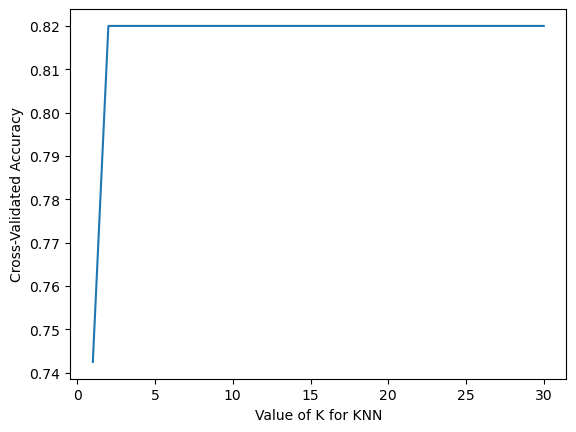

In [17]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
k_range = list(range(1, 31)) 
param_grid = dict(n_neighbors=k_range) 
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy') 
grid.fit(X, y) 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [19]:
print(grid.best_score_)
print(grid.best_params_) 
print(grid.best_estimator_)

0.82
{'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)


# Cross validation for model selection: 
-The first model is the KNeighborsClassifier in which the best parameter is n_neighbors = 2
-The second model is logistic regressing 
-The third model is linear regression and the Root Mean Squared Error (RMSE). The lower the RMSE, the less error-prone the model is.

In [20]:
##10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.82


In [21]:
# 10-fold cross-validation with logistic regression 
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.82


In [22]:
# Linear regression prediction and RMSE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
linreg = LinearRegression() 
linreg.fit(X_train, y_train) 
y_pred = linreg.predict(X_test) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.3448420154578035


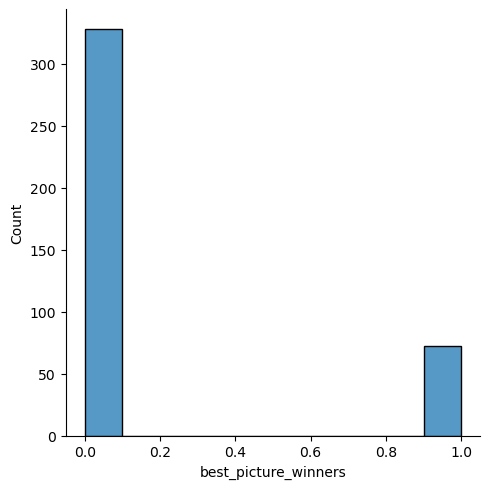

In [23]:
#Show best picture winners (1). and Nominees count
sns.displot(df['best_picture_winners']) 

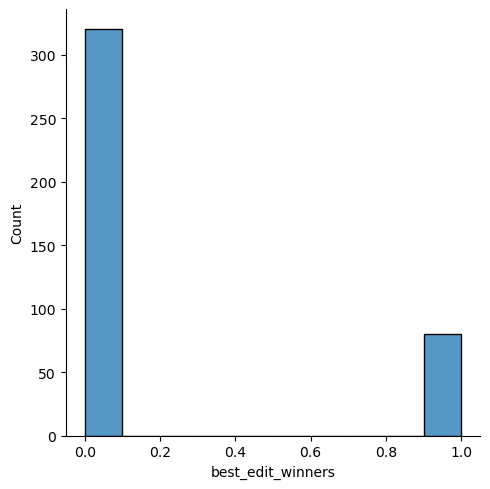

In [24]:
#Show best film editing winners (1). and Nominees count
sns.displot(df['best_edit_winners']) 

In [27]:
pip install nbconvert[webpdf]

     ---------------------------------------- 83.4/83.4 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 101.4/101.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
